In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
import random

In [2]:
df = pd.read_csv("labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [4]:
# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # lowercasing
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuation
    tokens = word_tokenize(text)  # tokenize the text
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['tweet'].apply(preprocess_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

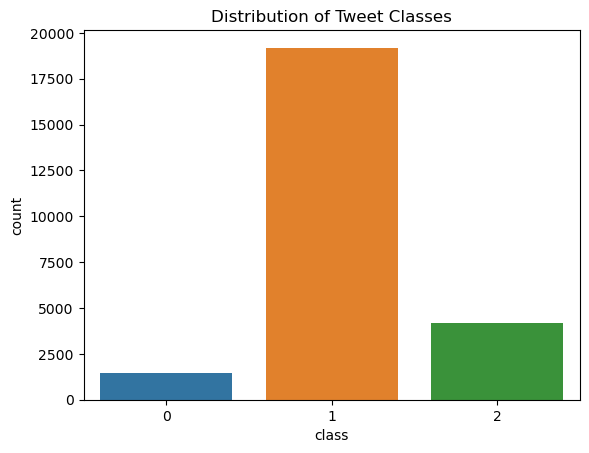

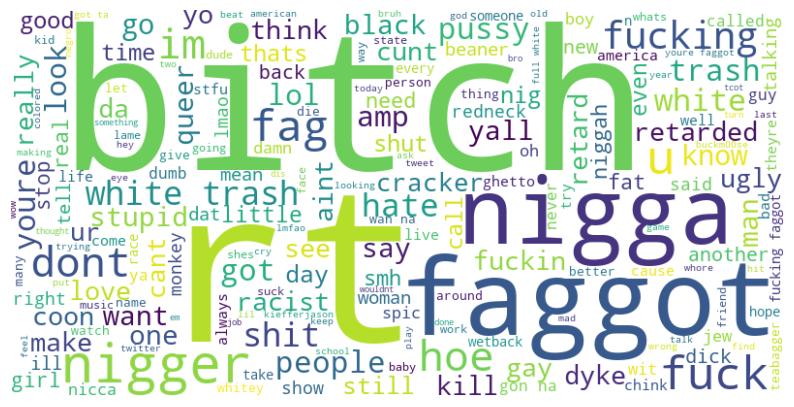

In [5]:
# Distribution of the classes
sns.countplot(x='class', data=df)
plt.title('Distribution of Tweet Classes')
plt.show()

# Word Cloud for Hate Speech tweets
hate_speech_posts = ' '.join(df[df['class'] == 0]['cleaned_text'])  # Class 0 is for hate speech
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hate_speech_posts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
# Encode labels (Optional - but helps in some models)
le = LabelEncoder()
df['encoded_class'] = le.fit_transform(df['class'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['encoded_class'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer (converting text to numeric features)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predicting
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluation
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.17      0.26       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.82      0.83       835

    accuracy                           0.89      4957
   macro avg       0.77      0.65      0.68      4957
weighted avg       0.88      0.89      0.88      4957



In [8]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predicting
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.14      0.21       290
           1       0.91      0.96      0.94      3832
           2       0.83      0.82      0.83       835

    accuracy                           0.89      4957
   macro avg       0.74      0.64      0.66      4957
weighted avg       0.87      0.89      0.87      4957



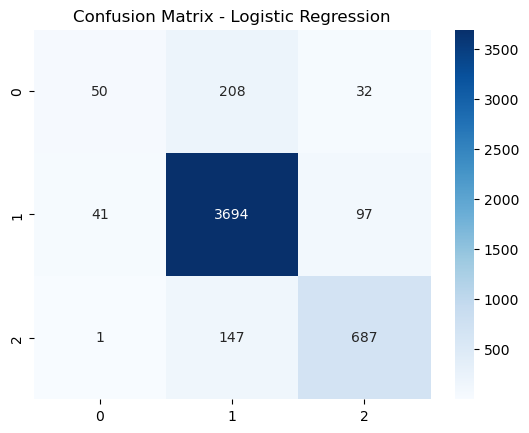

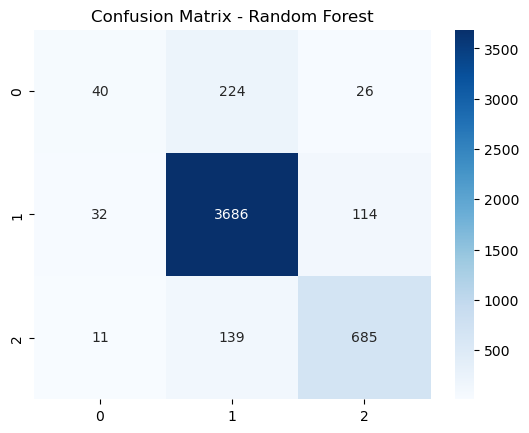

In [9]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [10]:
# ROC AUC for Logistic Regression
roc_auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test_tfidf), multi_class='ovr')
print(f'ROC AUC for Logistic Regression: {roc_auc_lr}')

# ROC AUC for Random Forest
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_tfidf), multi_class='ovr')
print(f'ROC AUC for Random Forest: {roc_auc_rf}')

ROC AUC for Logistic Regression: 0.9217461401928789
ROC AUC for Random Forest: 0.9183050535605425


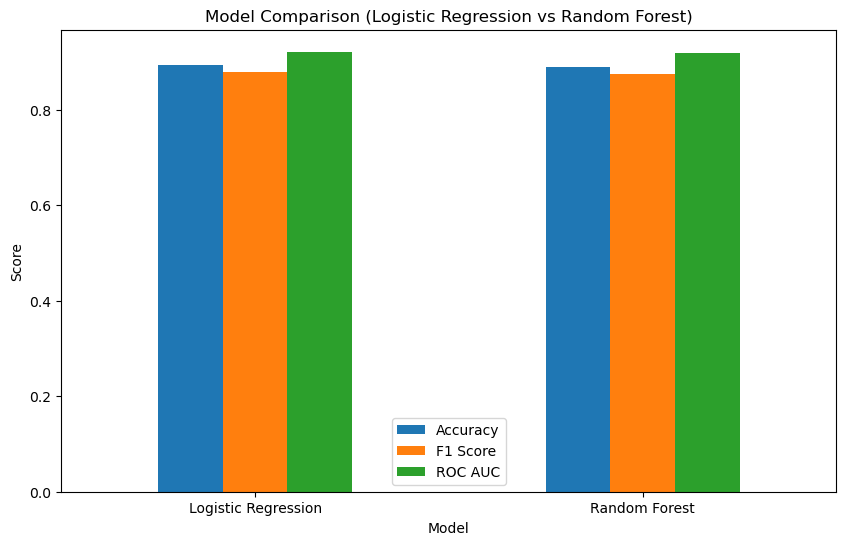

In [11]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Calculate Metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
roc_auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test_tfidf), multi_class='ovr')

# Calculate Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_tfidf), multi_class='ovr')

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_rf],
    'F1 Score': [f1_lr, f1_rf],
    'ROC AUC': [roc_auc_lr, roc_auc_rf]
})

# Set the Model as index for better plotting
metrics_df.set_index('Model', inplace=True)

# Plotting the comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison (Logistic Regression vs Random Forest)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()